In [3]:
#convertir les equations sous forme matricielle 
#contenue de la matrice et theta
import numpy as np;
from sklearn.datasets import make_regression
#pour visualiser les données 
import matplotlib.pyplot as plt 

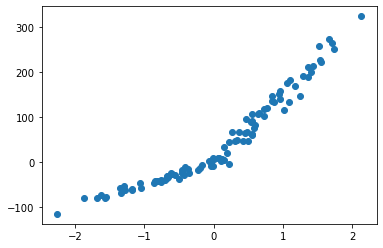

In [35]:
# un modèle polynomiale
x,y = make_regression(n_samples = 100 , n_features = 1, noise = 10)
y = y +abs(y/2)
plt.scatter(x,y)

In [36]:
print(x.shape)
#make_regression , les dimentions des y sont incompletes -- donc [reshape] pour redimentionner
y = y.reshape(y.shape[0],1) #on prend le nombre de lignes dans y appelé shape[0]
print(y.shape)

(100, 1)
(100, 1)


In [37]:
#créer matrice X 
#hstake coller deux vecteurs numpy ensemble
#je colle mon vexteur X à côté d'un vecteur des 1 qui a le même nombre de lignes que X
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2,X))
print (X.shape)
print (X[:10])#print juste les 10 première lignes 

(100, 3)
[[ 3.01448805e-01  5.49043536e-01  1.00000000e+00]
 [ 6.03992618e-01  7.77169620e-01  1.00000000e+00]
 [ 1.47443994e-04  1.21426518e-02  1.00000000e+00]
 [ 2.47273672e-01 -4.97266199e-01  1.00000000e+00]
 [ 3.06084932e-01 -5.53249430e-01  1.00000000e+00]
 [ 4.55329990e+00  2.13384627e+00  1.00000000e+00]
 [ 1.13422194e+00  1.06499856e+00  1.00000000e+00]
 [ 2.06299782e+00  1.43631397e+00  1.00000000e+00]
 [ 3.58677858e-01 -5.98897201e-01  1.00000000e+00]
 [ 1.54164572e+00  1.24163027e+00  1.00000000e+00]]


In [38]:
theta = np.random.randn(3,1)
theta.shape
theta

array([[0.14530437],
       [0.8348596 ],
       [0.96360069]])

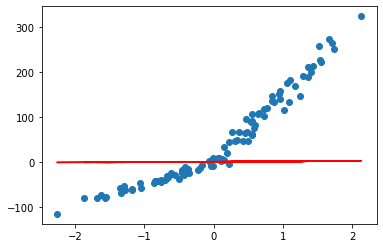

In [39]:
#Modèle linéraire 

def model (X,theta):
    #profuit matriciel
    return X.dot(theta)

plt.scatter(x,y)
plt.plot(x,model(X,theta),c ='r')

In [40]:
#fonction côut
def cost_fonction(x,y,theta):
    m = len(y)
    return 1/(2*m)* np.sum((model(X,theta)-y)**2)

In [41]:
cost_fonction (X,y,theta) #on veut que ce soit proche du 0

5853.974559202524

In [42]:
#gradients et descente de gradients 
def grad(X,y,theta):
    m = len(y)
    return 1/m* X.T.dot(model(X,theta)-y)

In [43]:
# descente de gradients 

def gradient_descent(X,y,theta,learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_fonction(X,y,theta)
    return theta, cost_history

In [44]:
theta_final, cost_history = gradient_descent(X,y,theta,learning_rate = 0.01, n_iterations = 1000)#soit, entriaine plus, soit augmente alpha = learning_rate
theta_final # ok j'ai changer le learning rate de 0.001 à 0.01  bcp mieux 

array([[25.40770471],
       [99.54885241],
       [16.42092529]])

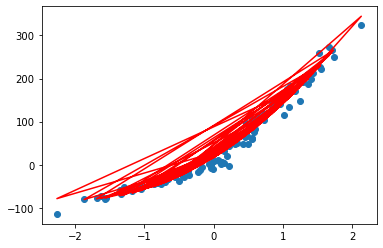

In [45]:
#créer un vecteur de prédiction 
prediction = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,prediction,c='r')

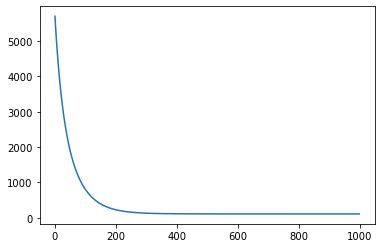

In [46]:
plt.plot(range(1000),cost_history) # à traver les 100

In [47]:
#évaluer  la performation du modèle pour montrer aux gens 
# la coéficient de détermination 
#moindre carré
#R²
def coef_determination (y,predi):
    u = ((y-predi)**2).sum()#residu de la somme des carrée
    v = ((y - y.mean())**2).sum()
    return 1 - u/v
coef_determination (y,prediction)

0.9772295611859987